<a href="https://colab.research.google.com/github/namzezz/IBM-MENTAL_HEALTH_FITNESS_TRACKER_NAMYA/blob/main/MentalHealthFitnessTracker_NamyaIBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IBM-MENTAL HEALTH FITNESS TRACKER**

## Importing the libraries

In [222]:
import warnings
warnings.filterwarnings('ignore')

In [223]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Importing the dataset

In [224]:
from google.colab import drive
drive.mount('/content/drive')

ds1 = pd.read_csv('/content/drive/MyDrive/DF/mental-and-substance-use-as-share-of-disease -AI.csv')
ds2 = pd.read_csv('/content/drive/MyDrive/DF/prevalence-by-mental-and-substance-use-disorder _AI.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
ds1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [226]:
ds2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [227]:
ds=pd.concat(objs=[ds2,ds1],axis=1)



In [228]:
ds.drop(['Entity','Code','Year'],axis=1,inplace=True)
ds=ds.fillna(ds.mean())

x=ds[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',]].to_numpy()

y=ds[['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']].to_numpy()

In [229]:
ds.head()

,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


#**DATA VISUALIZATION**

<Axes: >

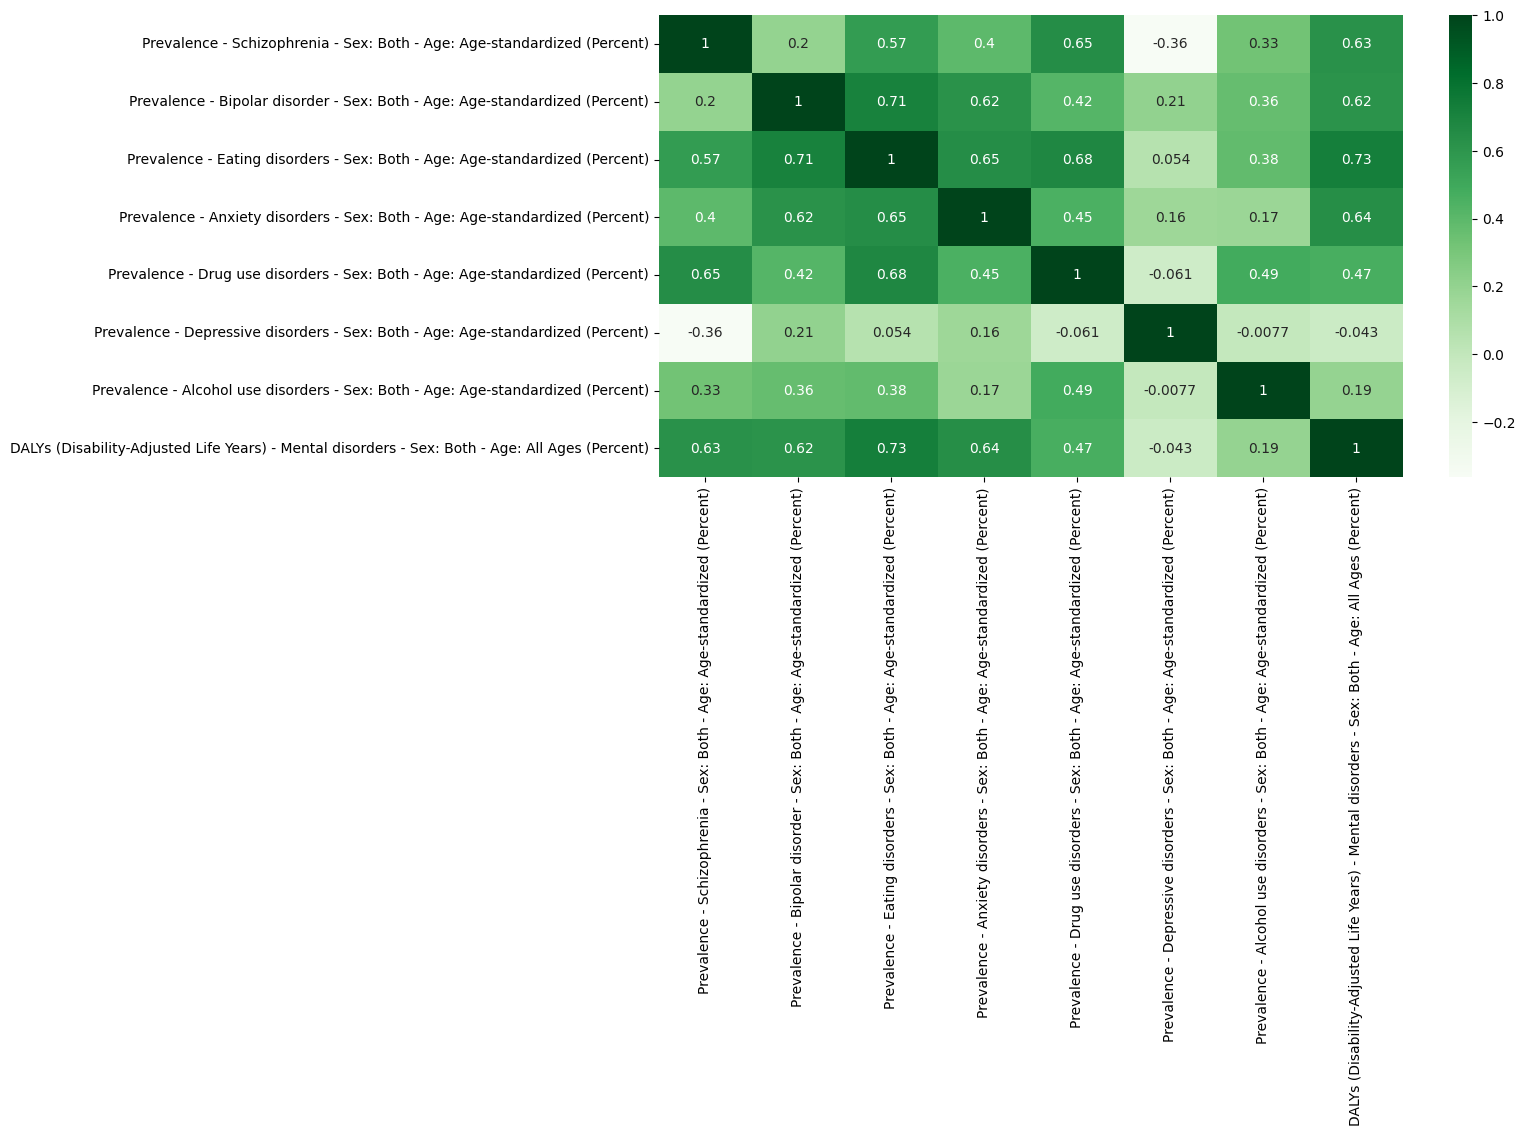

In [230]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.corr(),annot=True,cmap="Greens")

<Figure size 1500x1200 with 0 Axes>

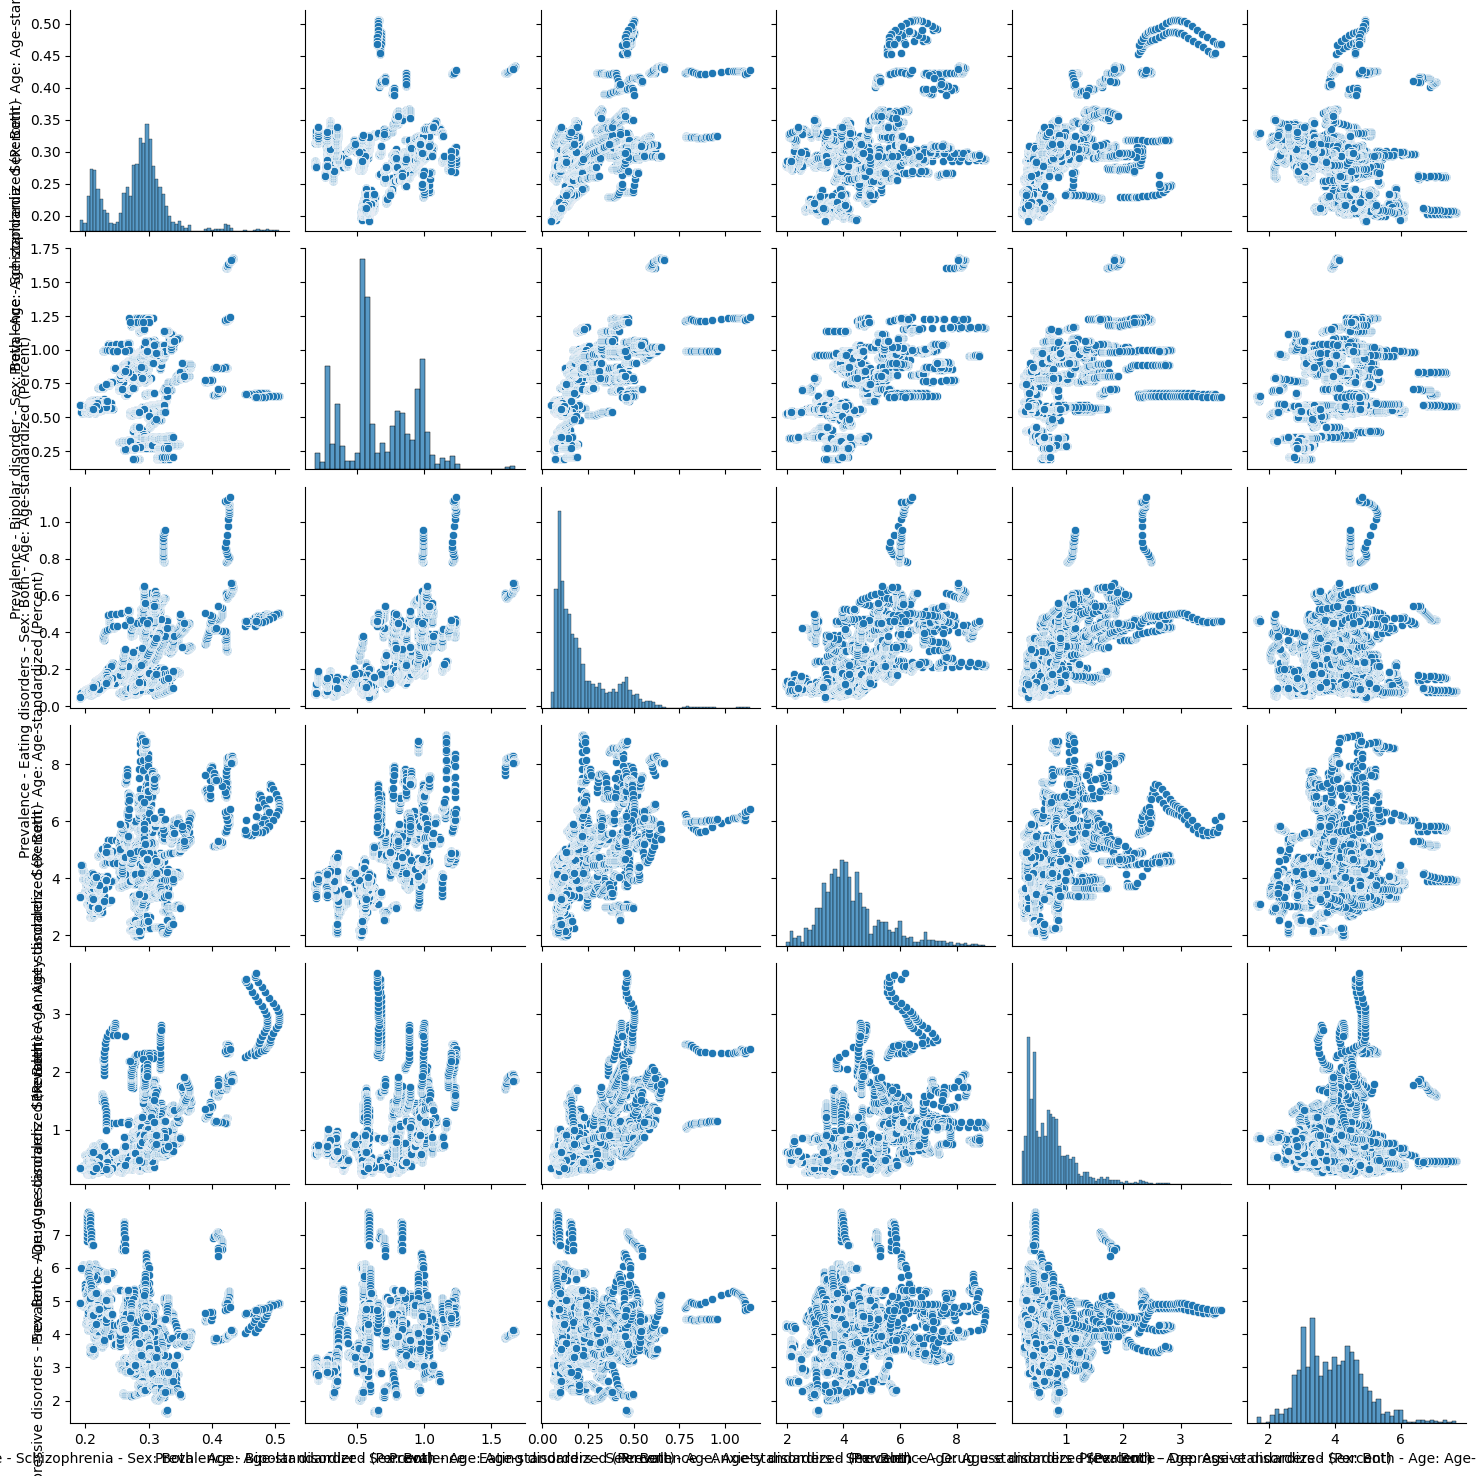

In [231]:
corr=ds.corr()
plt.figure(figsize=(15,12))
sns.pairplot(ds[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',]])

# **Data Preprocessing**

In [232]:
mean=ds['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].mean()
mean

4.8180618117506135

In [233]:
data=ds

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 1   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 2   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 3   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                     6840 non-null   float64
 4   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                    6840 non-null   float64
 5   Prevale

In [235]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=l.fit_transform(data[i])

In [236]:
data.shape

(6840, 8)

In [237]:
# # x=data.drop('DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',axis=1).to_numpy()

# # y=data['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].to_numpy()

# df.drop(['Entity','Code','Year'],axis=1,inplace=True)
# df=df.fillna(df.mean())

# x=df[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
#        'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
#        'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
#        'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
#        'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
#        'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',]].to_numpy()

# y=df[['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']].to_numpy()

## Splitting the dataset into the Training set and Test set

In [238]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2, random_state = 0)

#**REGRESSION MODEL SELECTION**


#**MULTIPLE LINEAR REGRESSION**

## Training the Multiple Linear Regression model on the Training set

In [274]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

In [275]:
y_pred = ml.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.04  4.76]
 [-0.88  2.73]
 [-0.2   4.41]
 ...
 [-0.06  4.79]
 [-1.07  1.35]
 [ 1.32  7.06]]


##Visualizing the **data**

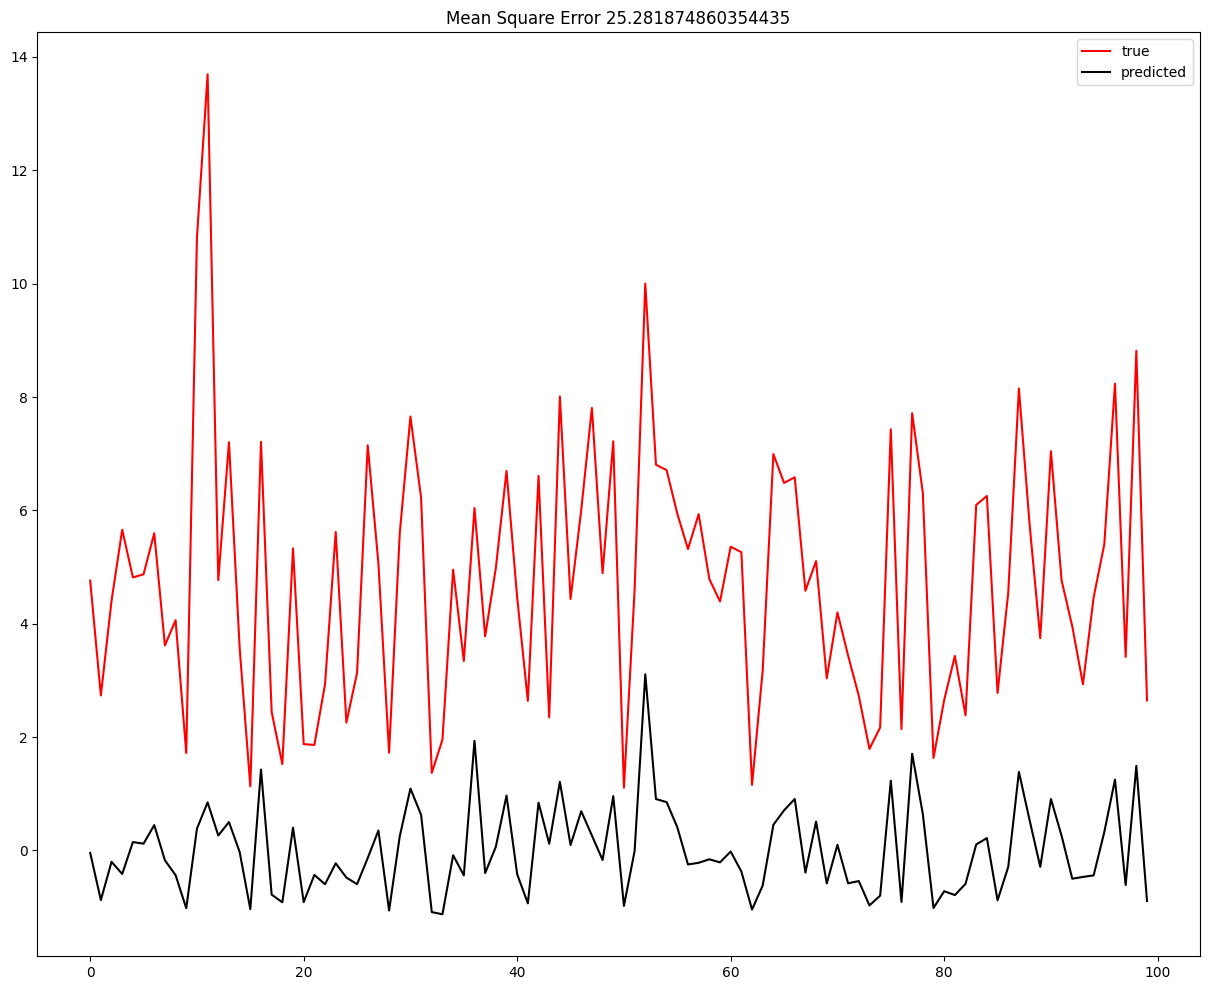

In [276]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [277]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The multiple linear regression model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The multiple linear regression model performance for training set
--------------------------------------------------------
Mean Square Error: 25.281874860354435
Root Mean Square Error: 5.028108477385351
R2: -3.9125113407668195


#**POLYNOMIAL REGRESSION**

## Training the Polynomial Regression model on the Training set

In [278]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
pr = LinearRegression()
pr.fit(x_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [279]:
y_pred = pr.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.01386  4.76057]
 [-0.82537  2.73486]
 [-0.17323  4.40571]
 ...
 [-0.02957  4.78585]
 [-1.41381  1.35131]
 [ 1.1191   7.05867]]


##Visualizing the **data**



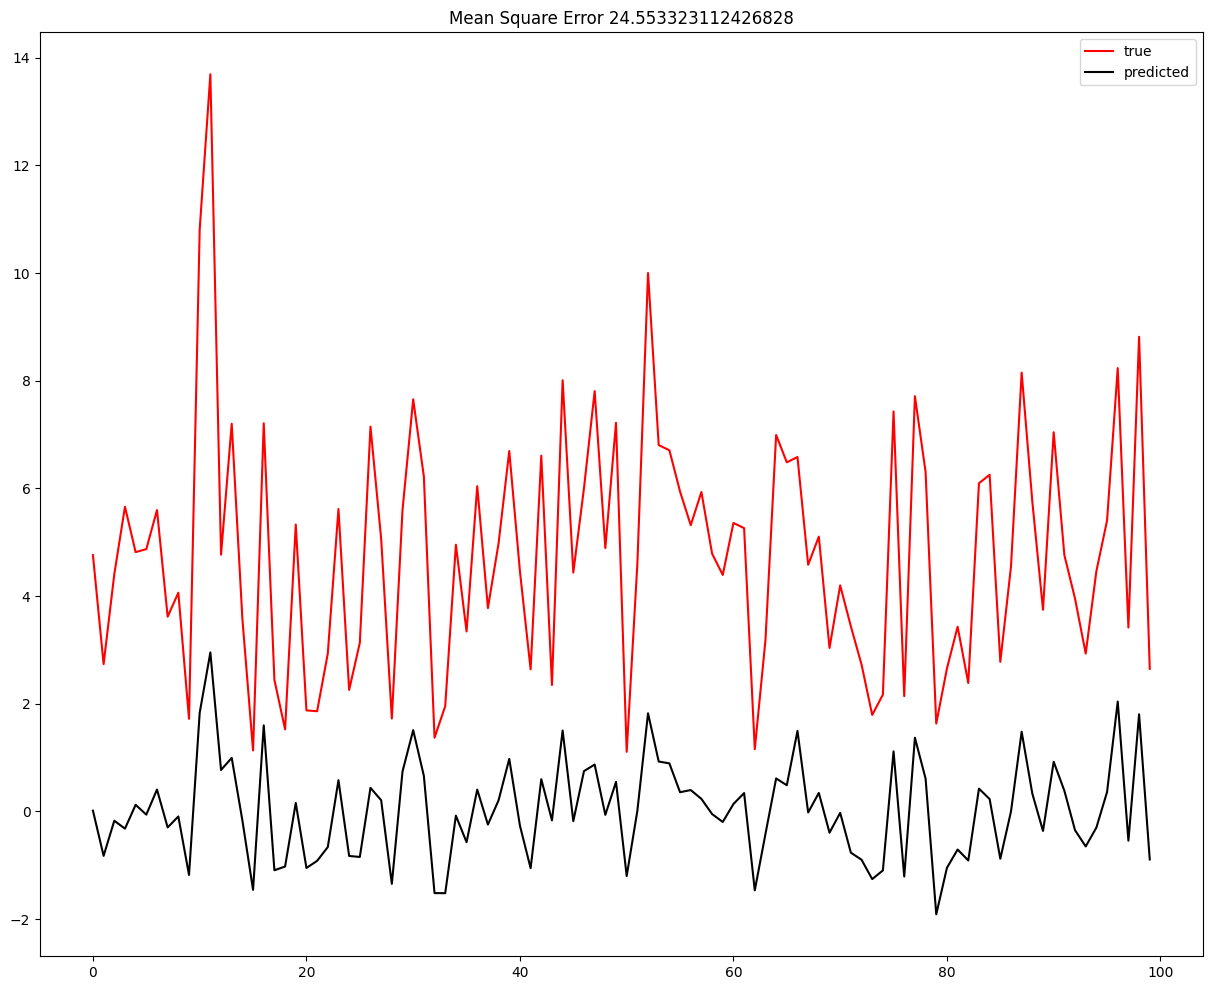

In [280]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [281]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The polynomial regression model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The polynomial regression model performance for training set
--------------------------------------------------------
Mean Square Error: 24.553323112426828
Root Mean Square Error: 4.95513098842269
R2: -3.7709467319789534


#**DECISION TREE REGRESSION**

## Training the Decision Tree Regression model on the Training set

In [266]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [267]:
y_pred = dt.predict(x_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##Visualizing the **data**



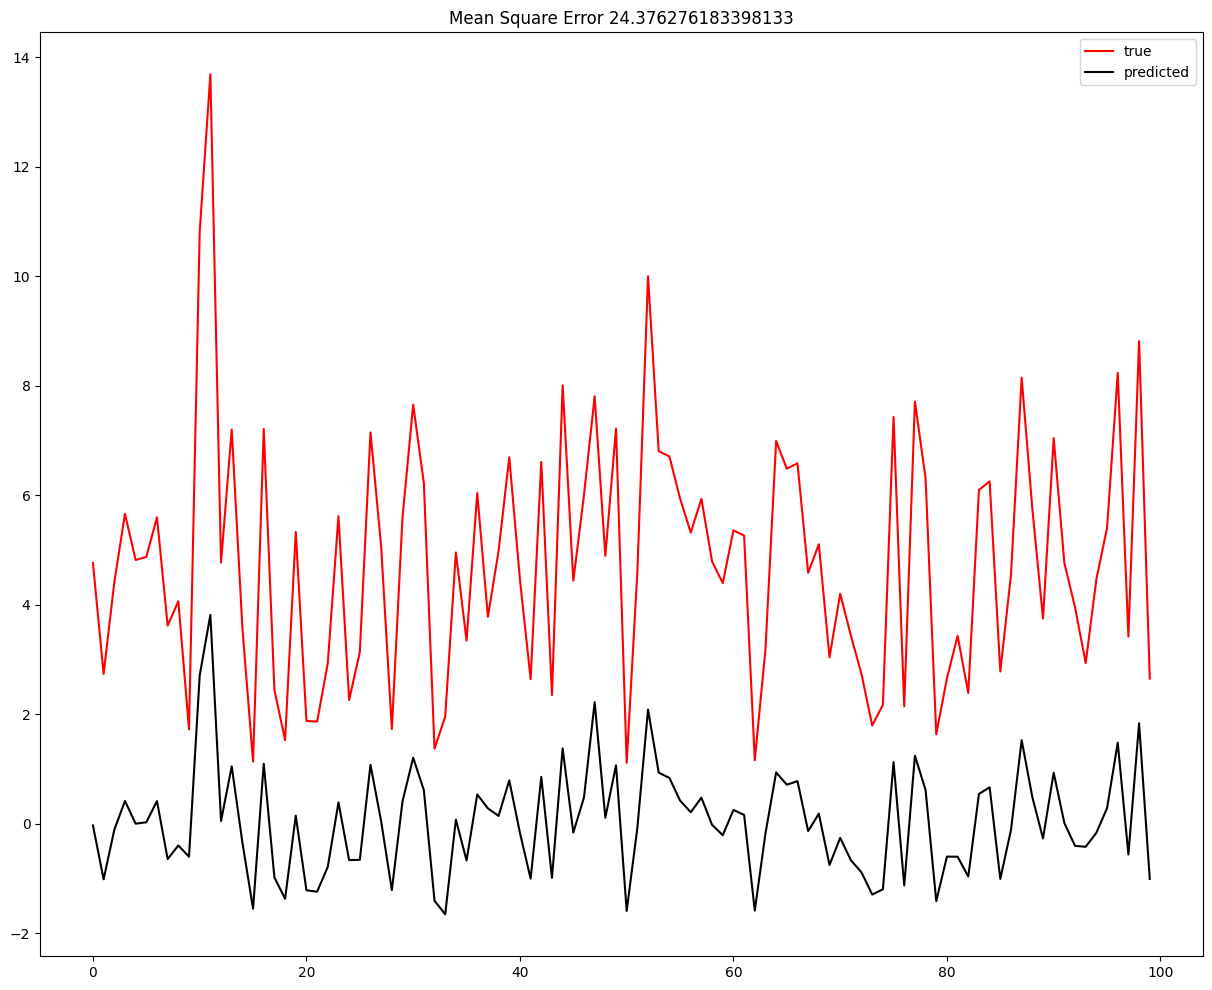

In [268]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [269]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The Decision Tree model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The Decision Tree model performance for training set
--------------------------------------------------------
Mean Square Error: 24.376276183398133
Root Mean Square Error: 4.937233656957925
R2: -3.7365448115713296


#**SUPPORT VECTOR REGRESSION**

## Feature Scaling

In [261]:
import numpy as np
from sklearn.preprocessing import StandardScaler
y = y.reshape(len(y),1)

sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)


## Training the SVR model on the Training set


In [262]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')

svr.fit(x_train, y_train)

SVR()

## Predicting the Test set results

In [263]:
y_pred = svr.predict(sc_x.transform(x_test)).reshape(-1,1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2.04e-04  4.76e+00]
 [-8.30e-01  2.73e+00]
 [ 9.92e-03  4.41e+00]
 ...
 [ 4.56e-03  4.79e+00]
 [-1.43e+00  1.35e+00]
 [ 1.16e+00  7.06e+00]]


##Visualizing the **data**



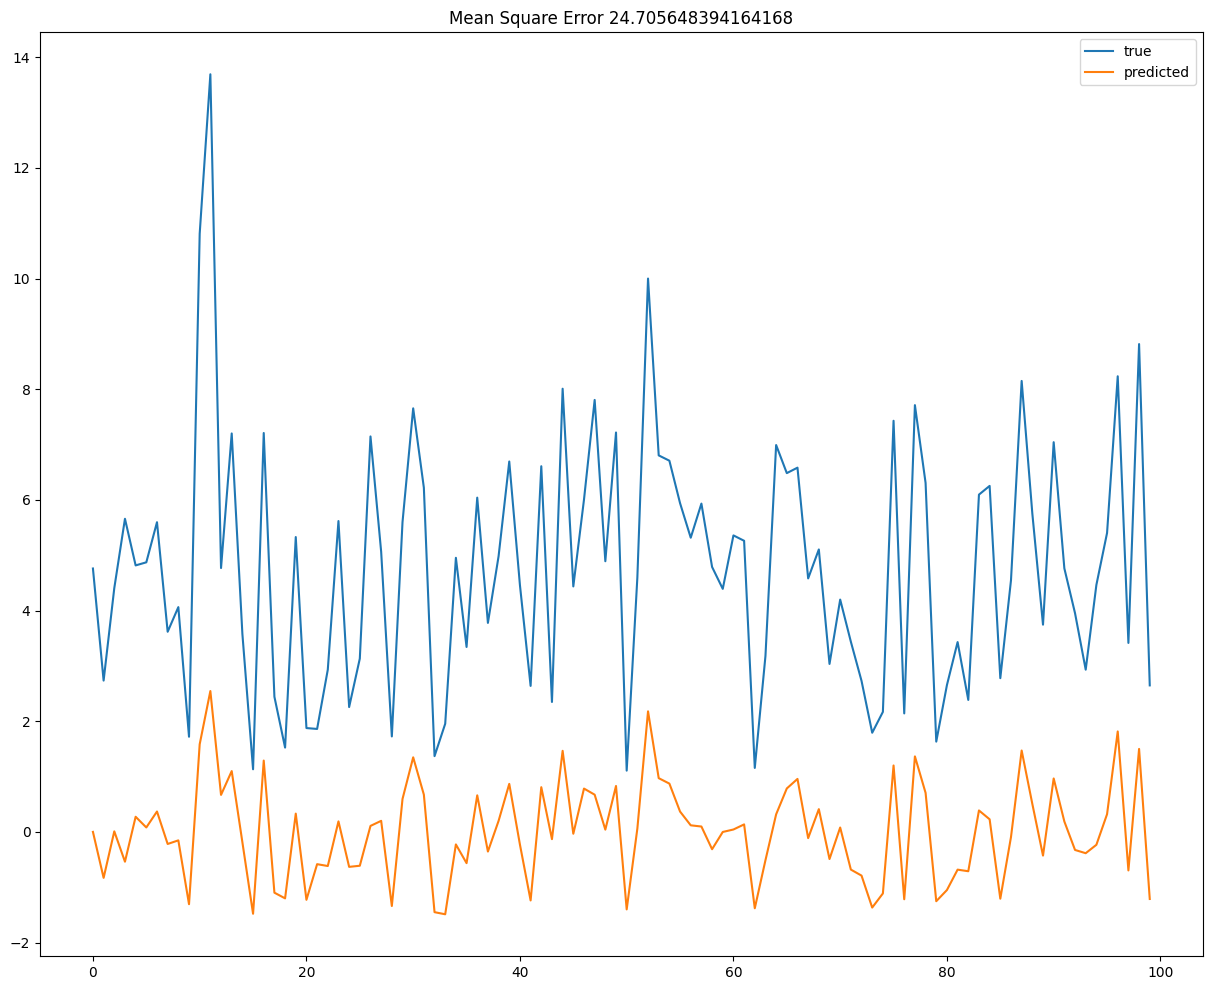

In [264]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100])
plt.plot(y_pred[:100])
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [265]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The SVR model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The SVR model performance for training set
--------------------------------------------------------
Mean Square Error: 24.705648394164168
Root Mean Square Error: 4.970477682694508
R2: -3.8005449986483937


#**RANDOM FOREST REGRESSION**

## Training the Random Forest Regression model on the whole dataset

In [196]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [197]:
y_pred =rf.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4.71 4.76]
 [2.76 2.73]
 [4.46 4.41]
 ...
 [4.87 4.79]
 [1.36 1.35]
 [7.06 7.06]]


##Visualizing the **data**



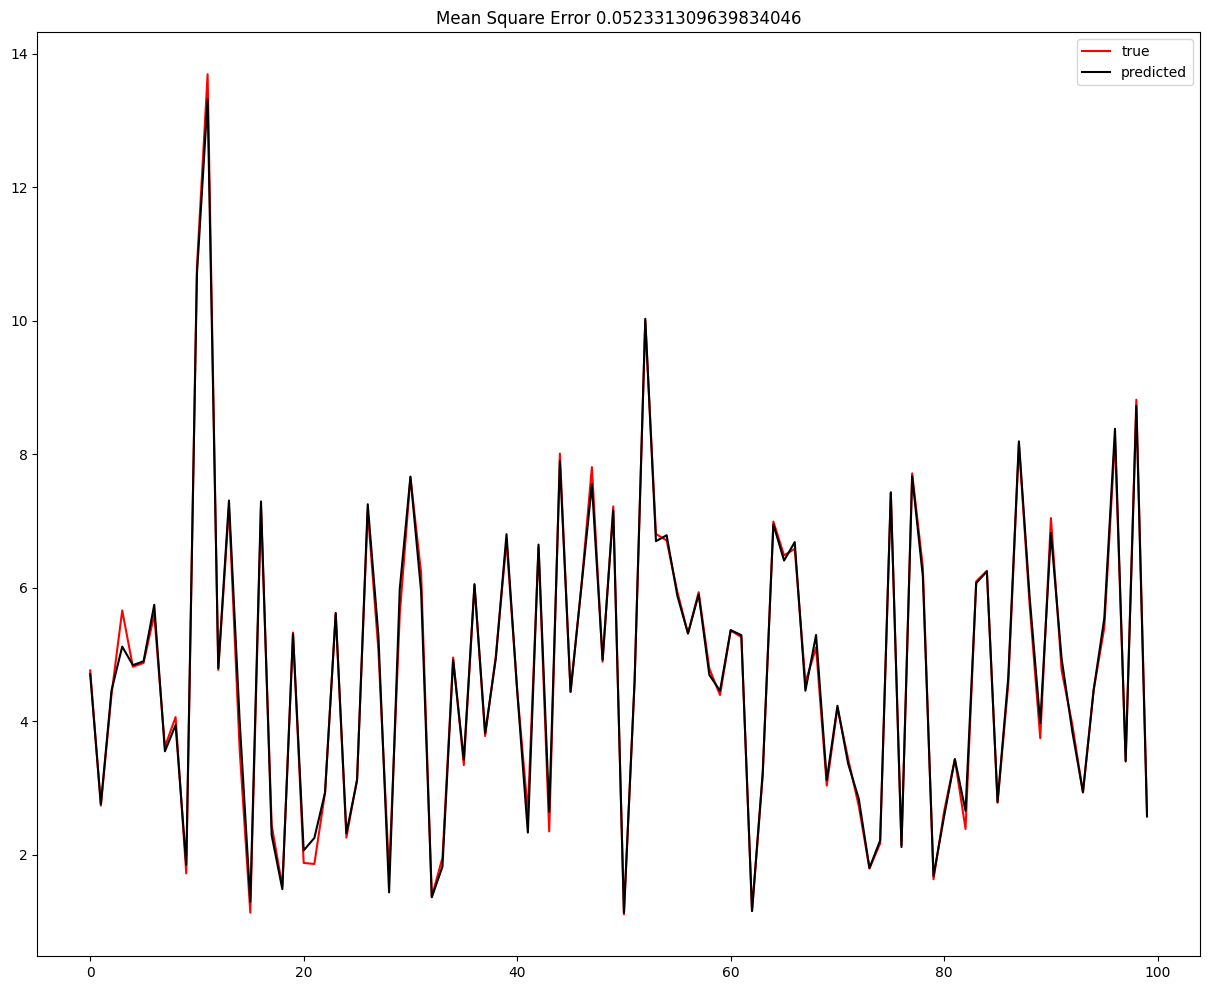

In [198]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [199]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The Random Forest Regression model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The Random Forest Regression model performance for training set
--------------------------------------------------------
Mean Square Error: 0.052331309639834046
Root Mean Square Error: 0.22876037602660573
R2: 0.989831523433177


# We observe that RANDOM FOREST REGRESSION model performs well on both training and testing data hence we will use it for prediction

In [283]:
import numpy as np

np.random.seed(range(0,100))
print("Welcome to Mental fitness Tracker!\nFill your details to check your mental fitness!")
schi=(float(input("Enter your schizopherenia rate in %(IF NO enter 0 ):")))*100
bipo_dis=(float(input("Enter your bipolar disorder rate in %( IF NO enter 0 ):")))*100
eat_dis=(float(input("Enter your Eating disorder rate in %( IF NO enter 0 ):")))*100
anx=(float(input("Enter your Anxiety rate in %( IF NO enter 0 ):")))*100
drug_use=(float(input("Enter your drug usage rate in %( IF NO enter 0 ):")))*100
depr=(float(input("Enter your depression rate in %( IF NO enter 0)")))*100
alch=(float(input("Enter your alchol consuming rate per year in %(IF NO enter 0)")))*100

prediction = rf.predict([[schi,bipo_dis,eat_dis,anx,drug_use,depr,alch]])
prediction_value = prediction[0]*10
print("Your Mental Fitness is {}% ".format(prediction_value))
print("\nThank you!")

Welcome to Mental fitness Tracker!
Fill your details to check your mental fitness!
Enter your schizopherenia rate in %(IF NO enter 0 ):1
Enter your bipolar disorder rate in %( IF NO enter 0 ):1
Enter your Eating disorder rate in %( IF NO enter 0 ):0
Enter your Anxiety rate in %( IF NO enter 0 ):10
Enter your drug usage rate in %( IF NO enter 0 ):0
Enter your depression rate in %( IF NO enter 0)12
Enter your alchol consuming rate per year in %(IF NO enter 0)5
Your Mental Fitness is 75.10003190630448% 

Thank you!
